In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read Dataset
df = pd.read_csv("/Users/nithinbodla/DataScience/DATASETS/height-weight (1).csv")

In [7]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [9]:
df.shape

(23, 2)

In [11]:
df.dtypes

Weight    int64
Height    int64
dtype: object

In [13]:
df.head(2)

,Weight,Height
0,45,120
1,58,135


In [15]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,23.0,73.826087,17.872407,45.0,59.0,78.0,86.0,105.0
Height,23.0,158.391304,19.511626,120.0,142.5,162.0,175.0,183.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [21]:
df.duplicated().sum()

1

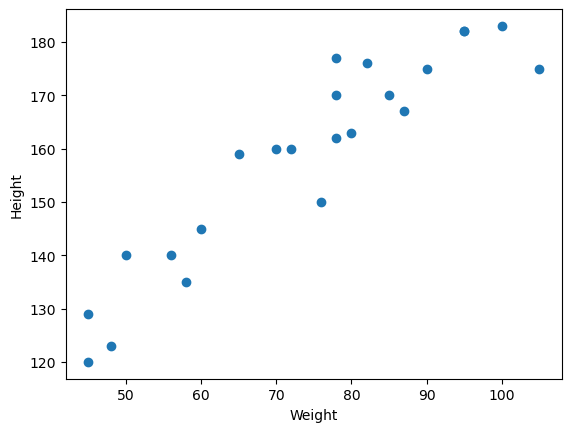

In [23]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [25]:
# Divide our data set into independent and dependent features
X = df['Weight']
y = df['Height']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [29]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [31]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [33]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
## Ensure X_train and X_test are DataFrames
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [37]:
# Standardize the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [41]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

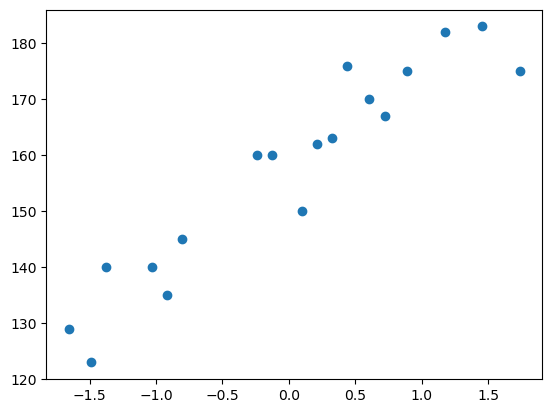

In [43]:
plt.scatter(X_train,y_train)
plt.show()

In [45]:
from sklearn.linear_model import LinearRegression

In [47]:
regressor = LinearRegression()

In [49]:
regressor

LinearRegression()

In [51]:
type(X_train)

numpy.ndarray

In [53]:
X_train = np.array(X_train).reshape(-1,1)

In [55]:
X_test = np.array(X_test).reshape(-1,1)

In [57]:
y_train.shape

(18,)

In [59]:
regressor.fit(X_train,y_train)

LinearRegression()

In [61]:
## coefficient and intercepts
print("Coefficient : ",regressor.coef_)
print("Intercept : ",regressor.intercept_)

Coefficient :  [17.03440872]
Intercept :  157.5


In [63]:
regressor.predict(X_train)

array([187.0869102 , 141.82375282, 182.27168069, 161.08467086,
       132.19329381, 177.45645118, 129.3041561 , 143.74984463,
       153.38030364, 159.15857905, 134.11938561, 139.89766102,
       155.30639545, 172.64122168, 164.93685446, 167.82599217,
       169.75208397, 163.01076266])

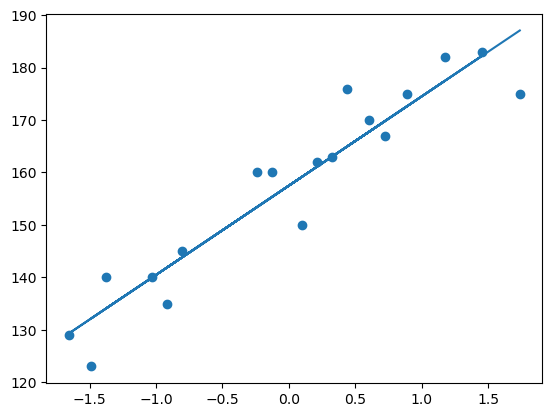

In [65]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))
plt.show()

In [67]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [69]:
y_pred_test = regressor.predict(X_test)

In [71]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

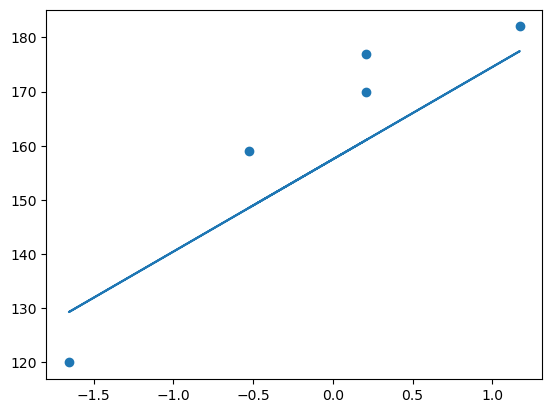

In [73]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))
plt.show()

In [75]:
## Loss functions
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [77]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [79]:
## Perdomance Metrics
from sklearn.metrics import r2_score

In [81]:
score = r2_score(y_test,y_pred_test)

In [83]:
print(score)

0.7769869860423441


# Testing the model

In [89]:
regressor.predict(scaler.transform([[75]]))

array([158.19553315])

# Assumptions

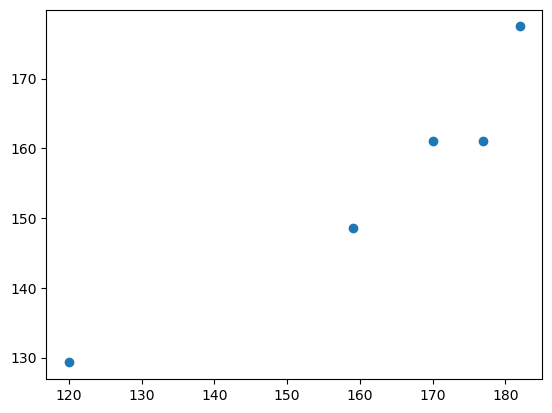

In [92]:
plt.scatter(y_test,y_pred_test)
plt.show()

In [96]:
## Residuals
residuals = y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

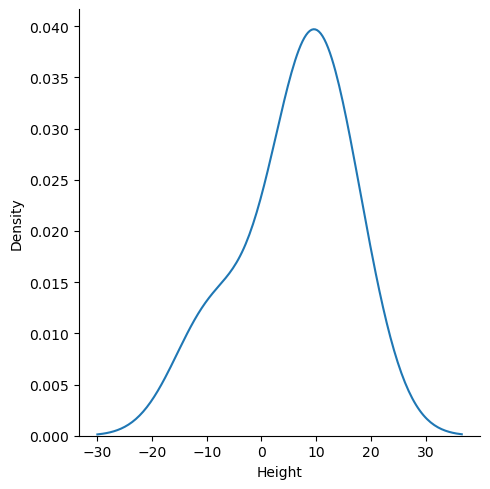

In [98]:
# PLot this residuals
sns.displot(residuals,kind='kde')
plt.show()

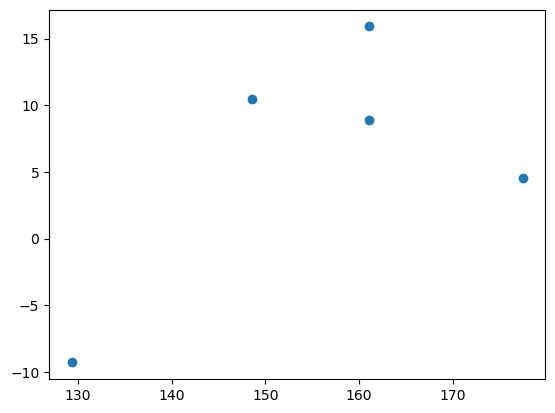

In [102]:
# Scatter plot with respect to prediction and residuals
# uniform distrbution
plt.scatter(y_pred_test,residuals)
plt.show()

In [104]:
df_results = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_test})
df_results

,Actual,Predicted
15,177,161.084671
9,170,161.084671
0,120,129.304156
8,182,177.456451
17,159,148.565074


# Using OLS

In [107]:
import statsmodels.api as sm

In [109]:
model = sm.OLS(y_train,X_train).fit()
prdictions = model.predict(X_test)

In [111]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Tue, 20 May 2025   Prob (F-statistic):                       0.661
Time:                        10:41:34   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------